In [11]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Weather dataset

### Importing dataset

In [12]:
weather = pd.read_csv('Weather_New.csv')
weather.head()

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,f,no
1,sunny,hot,high,t,no
2,overcast,hot,high,f,yes
3,rainy,mild,high,f,yes
4,rainy,cool,normal,f,yes


In [13]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      35 non-null     object
 1   temperature  35 non-null     object
 2   humidity     35 non-null     object
 3   windy        35 non-null     object
 4   play         35 non-null     object
dtypes: object(5)
memory usage: 1.5+ KB


### Check for null values

In [14]:
weather.isnull().sum()

outlook        0
temperature    0
humidity       0
windy          0
play           0
dtype: int64

### Converting data to numeric values

In [15]:
from sklearn.preprocessing import LabelEncoder as le

numeric_weather = pd.DataFrame()
numeric_weather['outlook'] = le().fit_transform(weather['outlook'])
numeric_weather['temperature'] = le().fit_transform(weather['temperature'])
numeric_weather['humidity'] = le().fit_transform(weather['humidity'])
numeric_weather['windy'] = le().fit_transform(weather['windy'])
numeric_weather['play'] = le().fit_transform(weather['play'])
numeric_weather.head()


,outlook,temperature,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


### Correlation matrix

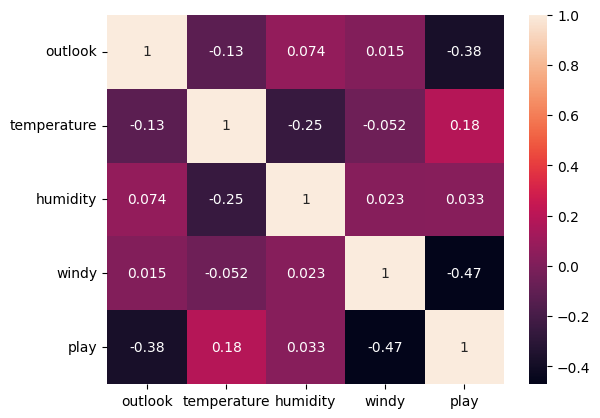

In [16]:
sb.heatmap(numeric_weather.corr(), annot=True)
plt.show()

### Splitting train and test data

In [17]:
from sklearn.model_selection import train_test_split

x = numeric_weather.drop('play', axis=1)
y = numeric_weather.play

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0, stratify=y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(28, 4)
(7, 4)
(28,)
(7,)


### Classifying using decision tree

Actual class: [1 1 1 0 0 1 0]
predictions: [1 0 1 1 1 1 0]
Accuracy: 57.14285714285714 %
Confusion matrix:


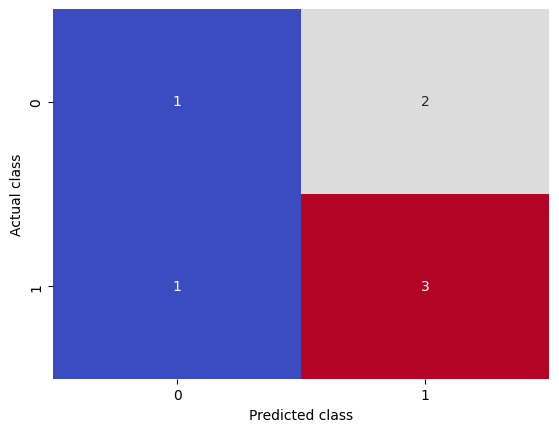

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)
pred = tree_clf.predict(x_test)
print("Actual class:", y_test.values)
print("predictions:", pred)
print("Accuracy:", accuracy_score(y_test, pred) * 100, "%")
print("Confusion matrix:")
confusion_matrix = confusion_matrix(y_test, pred)
sb.heatmap(confusion_matrix, cmap='coolwarm', annot=True, cbar=False).set(
    xlabel='Predicted class', ylabel='Actual class')
plt.show()

### Precision, F1 score, error rate and sensetivity

In [19]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, pred))
print("Error rate: ", 1-(accuracy_score(y_test, pred)))


Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.60      0.75      0.67         4

    accuracy                           0.57         7
   macro avg       0.55      0.54      0.53         7
weighted avg       0.56      0.57      0.55         7

Error rate:  0.4285714285714286


### ROC graph

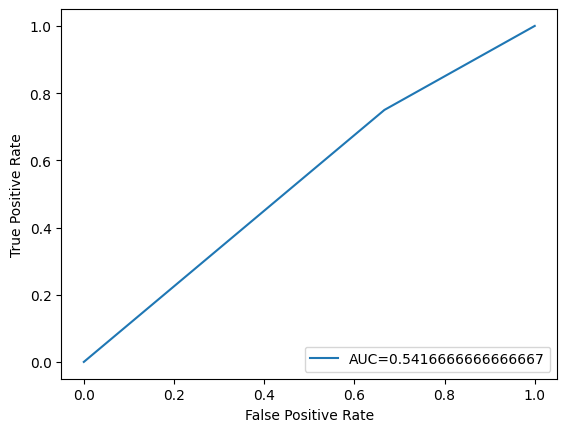

In [20]:
from sklearn import metrics

FPrate, TPrate, _ = metrics.roc_curve(y_test,  pred, pos_label=1)
auc = metrics.auc(FPrate, TPrate)
plt.plot(FPrate, TPrate, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
